### Problem definition

Predicting diamond prices by their cut, color, clarity and othe attributes.

### Data

This dataset contains prices and other attributes of about 54,000 diamonds. The data is gathered in one CSV file.

Feature description:

* **carat** - weight of the diamond (0.2--5.01)

* **cut** - quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* **color** - diamond colour, from J (worst) to D (best)

* **clarity** - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* **depth** - total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* **table** - width of top of diamond relative to widest point (43--95)

* **price** - price in US dollars (326-18,823 US Dollars)

* **x** - length in mm (0--10.74)

* **y** - width in mm (0--58.9)

* **z** - depth in mm (0--31.8)

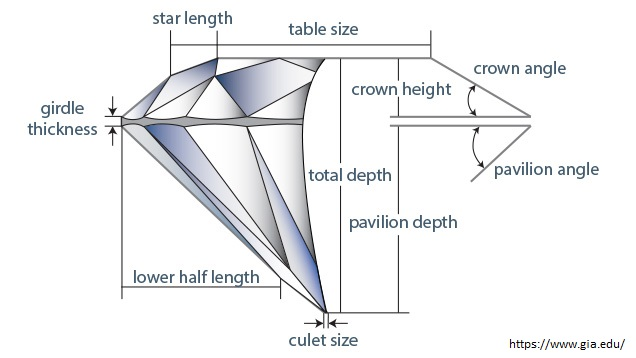 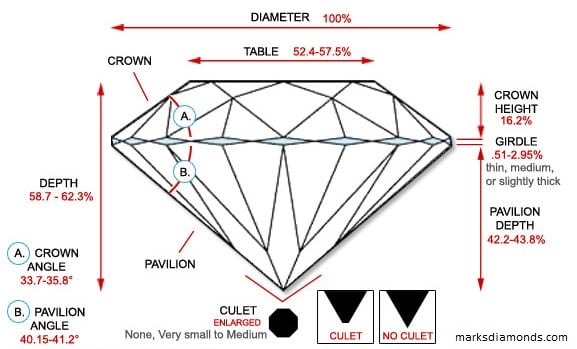


In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

### Load the data

In [ ]:
df = pd.read_csv('../input/diamonds/diamonds.csv', index_col=[0])

### Data exploration (EDA)

In [ ]:
df.head(20)

In [ ]:
df.tail(20)

In [ ]:
# Let's get some basic information about dataset
df.info()

### The key thing to get from here is that:
* We have 10 column from which 7 of them are numerical and 3 of them are object types, so we will have to change categorical variables into numbers
* We have no null values (but that doesn't mean all of them are with correct input)

In [ ]:
# Just to make sure let's check null values
df.isna().sum()

In [ ]:
# Let's see some descriptive statistics
df.describe()

In [ ]:
# Everything looks normal besides that there are 0 values for dimensions (x, y, z). We have to take a closer look at that.
# First let's see how many are there:
df.loc[(df.x==0) | (df.y==0) | (df.z==0)]

In [ ]:
# There is not so many of them so for now we can remove those examples
cond = df[(df["x"]==0) | (df["y"]==0) | (df["z"]==0)].index
df.drop(cond, inplace=True)

In [ ]:
# Let's make sure everything went well:
df.loc[(df.x==0) | (df.y==0) | (df.z==0)], df.shape

### As we can see there are 53920 instead of 53940 examples so everything is ok.

### Filling and turning categorical variables into numbers

In [ ]:
# Check for columns which aren't numeric
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

In [ ]:
# Turning categorical variables into numbers
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes+1

pd.Categorical(df["cut"]).codes, pd.Categorical(df["color"]).codes, pd.Categorical(df["clarity"]).codes,  

In [ ]:
# Now all of the features are presented as numbers
df.head()

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Correlation heatmap - Diamonds attributes', fontdict={'fontsize':18}, pad=15)
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

#### As we can see on the correlation matrix there is a strong positive correlation between price and weight (carat) and price and size (x, y, z) of a diamond. The other attributes don't have strong positive or negative correlation. On other features we should focus when comparing diamonds with similar size and weight.

In [ ]:
# Let's plot numerical variables
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2,
                                                       ncols=3,
                                                       figsize=(15,10))
# Price vs weight plot
scatter = ax0.scatter(x=df["price"],
                      y=df["carat"],
                      color="red")
ax0.set(title="Price vs weight[carat]",
        xlabel="Price",
        ylabel="Weight[carat]")

# Price vs depth plot
scatter = ax1.scatter(x=df["price"],
                      y=df["depth"],
                      color="green")
ax1.set(title="Price vs depth percentage",
        xlabel="Price",
        ylabel="Depth")

# Price vs table plot
scatter = ax2.scatter(x=df["price"],
                      y=df["table"],
                      color="blue")
ax2.set(title="Price vs table size",
        xlabel="Price",
        ylabel="Table")

# Price vs x-dimension plot
scatter = ax3.scatter(x=df["price"],
                      y=df["x"],
                      color="orange")
ax3.set(title="Price vs x-length dimension",
        xlabel="Price",
        ylabel="x-length")

# Price vs y-dimension plot
scatter = ax4.scatter(x=df["price"],
                      y=df["y"],
                      color="orange")
ax4.set(title="Price vs y-width dimension",
        xlabel="Price",
        ylabel="y-width")

# Price vs z-dimension plot
scatter = ax5.scatter(x=df["price"],
                      y=df["z"],
                      color="orange")
ax5.set(title="Price vs z-depth dimension",
        xlabel="Price",
        ylabel="z-depth");

#### We have to take a closer look to outliers. In the case of dimensions (x, y, z) together with table size, there are propably wrong inputs. With the weight and depth we there are only a few outliers so we can assume that those are very rare cases so we can skip them.
